In [1]:
import pandas as pd
import numpy as np
df = pd.read_excel("集市帖聚合提取.xlsx")
df

,消息时间,消息内容
0,2023/9/1 0:01,收仓鼠粮高数A2补考求问心理问题
1,2023/9/1 0:14,想收个二手自行车
2,2023/9/1 0:32,卡帕床垫6号楼怎么晒被子请问八公寓上铺的遮光帘尺寸转专业求助
3,2023/9/1 0:52,22学生公寓限电功率多少
4,2023/9/1 7:12,闲置衣架1号七点多哈西拼车回校专业排名掉了请问新生车辆怎么进学校啊商委红肠家长入校选改革开放...
...,...,...
4344,2023/10/20 12:00,收生化下册书找充电宝抱歉抱歉彩棠拼单静泉灵同学校园**掉了有uu去看周日晚上张九南的相声吗
4345,2023/10/20 12:16,求一张21号漫展HACG**有偿求讲大一高数染发家属区染发拼WHC小金蛋
4346,2023/10/20 12:31,东西丢了求问现在还有哪些校组织招人吗有偿借Applewatch16公寓求收纳盒奥林拼喜茶电动...
4347,2023/10/20 12:43,出一个林大毕业纪念盒收明天21号漫展**出HACG**一张出Creva适乐肤神经酰胺屏障修护...


In [2]:
import jieba
counts = {}
for txt in df['消息内容']:
    words = jieba.lcut(txt)
    for word in words:
        if len(word) == 1: #排除单个字符的分词结果
            continue
        else:
            counts[word] = counts.get(word,0) + 1
items = list(counts.items())
items.sort(key=lambda x:x[1], reverse=True)
items.remove(('一个',627))
items

Building prefix dict from the default dictionary ...


Loading model from cache C:\Users\hp\AppData\Local\Temp\jieba.cache
Loading model cost 0.551 seconds.
Prefix dict has been built successfully.


[('图书馆', 1038),
 ('校区', 614),
 ('出书', 572),
 ('拼车', 525),
 ('求助', 515),
 ('学校', 514),
 ('有没有', 512),
 ('老师', 491),
 ('有偿', 468),
 ('柜子', 439),
 ('自行车', 416),
 ('可以', 388),
 ('英语', 388),
 ('同学', 387),
 ('推荐', 387),
 ('怎么', 369),
 ('什么', 364),
 ('求问', 354),
 ('耳机', 354),
 ('全新', 344),
 ('有人', 338),
 ('资料', 327),
 ('快递', 314),
 ('研究生', 314),
 ('闲置', 309),
 ('哪里', 298),
 ('体测', 298),
 ('搭子', 279),
 ('公寓', 278),
 ('食堂', 274),
 ('考研', 270),
 ('电动车', 246),
 ('联系方式', 243),
 ('全套', 241),
 ('丹青', 240),
 ('一下', 230),
 ('出大一', 230),
 ('明天', 215),
 ('今天', 212),
 ('人们', 209),
 ('便宜', 207),
 ('机场', 205),
 ('专业', 197),
 ('请问', 195),
 ('考试', 195),
 ('收书', 195),
 ('二手', 192),
 ('16', 192),
 ('哈尔滨', 191),
 ('外卖', 191),
 ('校园', 187),
 ('几点', 177),
 ('校园卡', 174),
 ('英语书', 170),
 ('一本', 169),
 ('现在', 169),
 ('手机', 162),
 ('下午', 157),
 ('大一', 155),
 ('晚上', 153),
 ('床上', 150),
 ('充电', 150),
 ('打印', 148),
 ('学院', 146),
 ('女生', 145),
 ('代取', 145),
 ('附近', 142),
 ('实验', 142),
 ('一起', 142),
 ('时候', 140),
 ('二楼', 

In [3]:
total_count = 0
for item in items:
    total_count += item[1]
total_count

81117

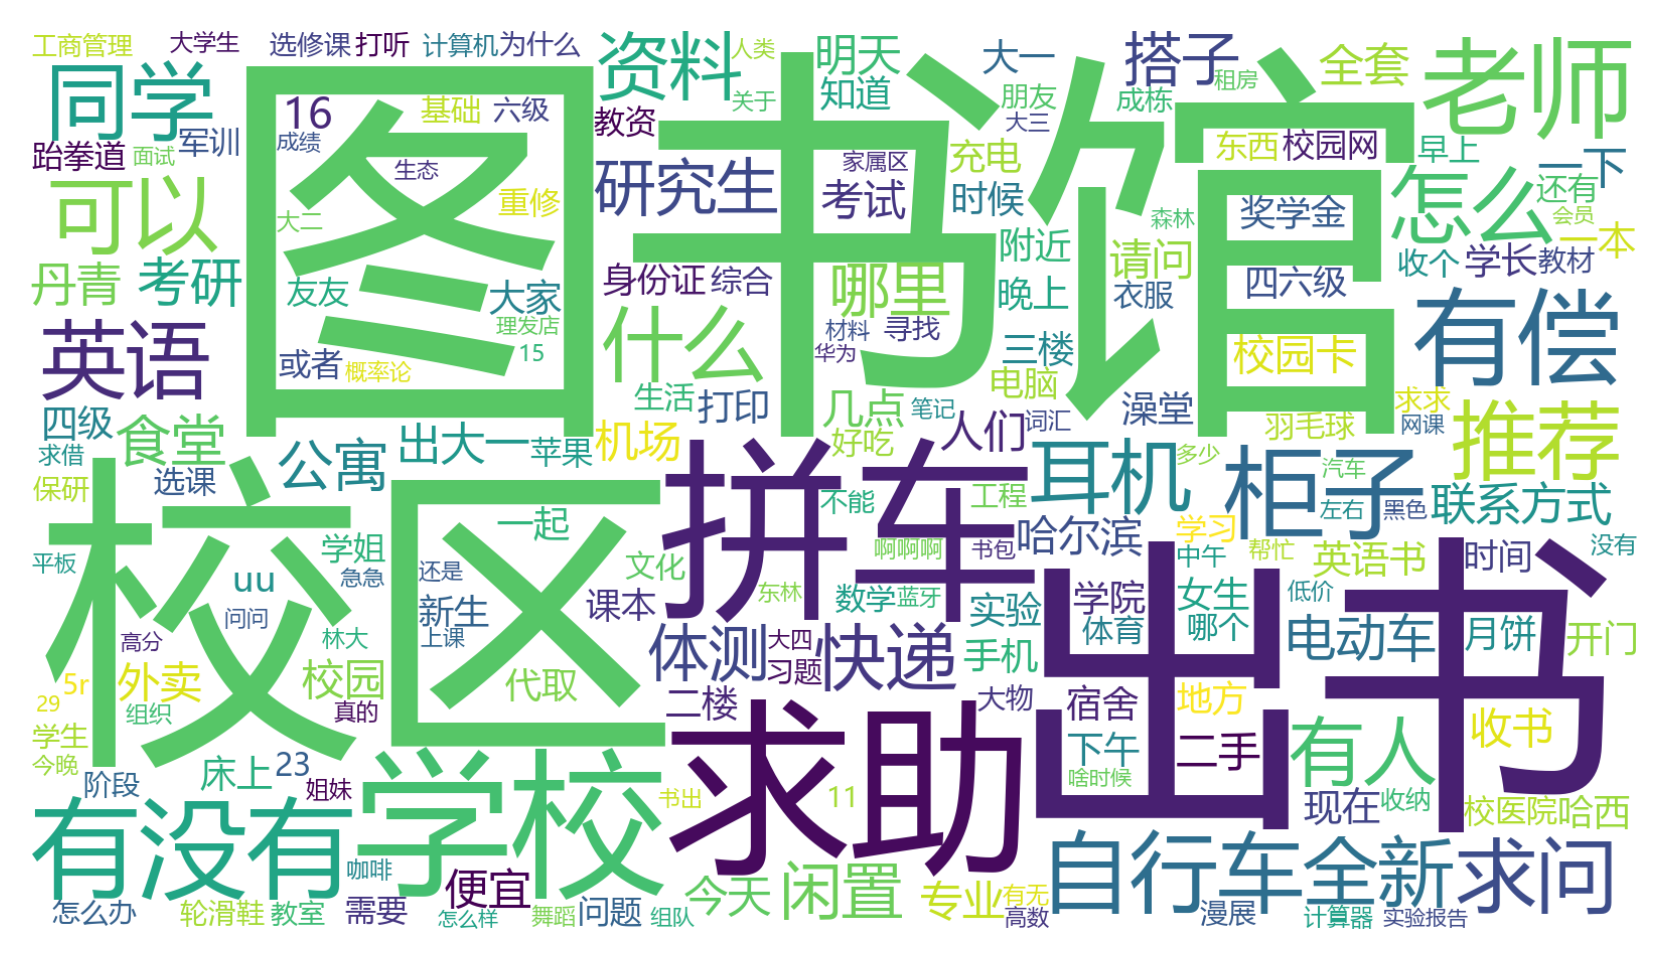

In [4]:
import wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']


top_words = items[:10]
counts_dict = dict(items)


stopwords = {'你', '呢', '又', '人', '但是', '把', '那', '就', '地', '上下', '他', '我', '吧', '会', 
             '一', '们', '着', '哦', '去', '什么', '了', '那么', '在', '它', '是', '这', '可是', '都', 
             '啊', '没', '这样', '于是', '她', '说', '不', '也', '这时', '的', '哪个', '有', '一个', '嗯', '没'}

wc = WordCloud(
    font_path='msyh.ttc',
    background_color='white',
    width=1600,  # 调整图像宽度
    height=900,  # 调整图像高度
    stopwords=stopwords,
    prefer_horizontal=1,  # 设置水平显示的词的比例
    min_font_size=4,  # 设置最小的字体大小
    max_words=200,  # 设置最大显示的词数
    max_font_size=400,  # 设置字体最大值
    random_state=42,  # 设置随机生成状态，即多少种配色方案
    scale=1,  # 放大
    normalize_plurals=False,  # 取消复数形式
    collocations=False,  # 是否包括两个词的搭配
    margin=2,  # 词间间距
    contour_width=0,  # 描边宽度
    contour_color='steelblue',  # 描边颜色
    colormap='viridis',  # 颜色风格
)


# 生成词云
wc.generate_from_frequencies(counts_dict)

# 显示词云图像
plt.figure(figsize=(10, 4),dpi=300)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [5]:
df2 = pd.DataFrame(items,columns=["词","频数"])
df2

,词,频数
0,图书馆,1038
1,校区,614
2,出书,572
3,拼车,525
4,求助,515
...,...,...
15443,救大命,1
15444,抗糖,1
15445,抗氧,1
15446,乳修,1


In [6]:
df2.to_excel("词频.xlsx",index=False)

In [7]:
s = 38521#帖子数

In [8]:
df2=df2[df2["频数"] > 57]
df2


,词,频数
0,图书馆,1038
1,校区,614
2,出书,572
3,拼车,525
4,求助,515
...,...,...
200,室友,58
201,书籍,58
202,出个,58
203,经济学,58


In [9]:
df2["percent"] = df2["频数"]/s
df2

C:\Users\hp\AppData\Local\Temp\ipykernel_4392\2461930302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["percent"] = df2["频数"]/s


,词,频数,percent
0,图书馆,1038,0.026946
1,校区,614,0.015939
2,出书,572,0.014849
3,拼车,525,0.013629
4,求助,515,0.013369
...,...,...,...
200,室友,58,0.001506
201,书籍,58,0.001506
202,出个,58,0.001506
203,经济学,58,0.001506


In [10]:
df2.to_excel("词频统计.xlsx",index=False)